In [1]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# 1. Linear model

## $R^2$ (coefficient of determination) score function
URL https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

## $R^2 = 1 - \frac{\frac{1}{n} \sum_{i=1}^n (y_i - \widehat{y_i})^2}{\frac{1}{n} \sum_{i=1}^n (y_i - \bar{y_i})^2} = 1 - \frac{residual\_sum\_of\_square}{total\_sum\_of\_ squares} = 1 - \frac{RSS}{TSS}$

- $𝑅^2$ value of 100% means the model explains all the variation of the target variable. 
- And a value of 0% measures zero predictive power of the model. 
- **So, the higher the R-squared value, the better the model.**
- During the worse cases, R2 score can even be negative. There are cases where the computational definition of $𝑅^2$ can yield negative values, depending on the definition used. $𝑅^2$ is bounded above by 1.0, but it is not bounded below. The reason is the evaluation (score) on unseen data, which can lead to results outside <0,1>. If $R^2$ on the same data fitted to the model will produce a score within <0, 1>, but **don't do that**.

In [2]:
from sklearn.metrics import r2_score

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(r2_score(y_true, y_pred))

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(r2_score(y_true, y_pred, multioutput='variance_weighted'))

y_true = [1, 2, 3]
y_pred = [1, 2, 3]
print(r2_score(y_true, y_pred))

y_true = [1, 2, 3]
y_pred = [2, 2, 2]
print(r2_score(y_true, y_pred))

y_true = [1, 2, 3]
y_pred = [3, 2, 1]
print(r2_score(y_true, y_pred))

0.9486081370449679
0.9382566585956417
1.0
0.0
-3.0


## Diabetes linear modeling, MSE and $R^2$

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


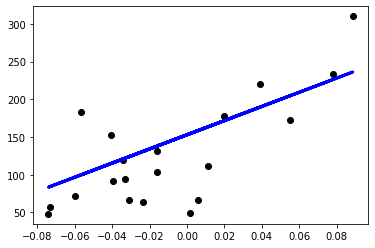

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

# 2. Linear Regression

## 2.1 Simple Linear Regression with scikit-learn

URL https://realpython.com/linear-regression-in-python/

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

# modelling
model = LinearRegression()
model.fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

# scoring
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

intercept: 5.633333333333329
slope: [0.54]
coefficient of determination: 0.7158756137479542


**prediction**

In [5]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


**prediction on new data**

In [6]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)

y_new = model.predict(x_new)
print(y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


**two-dimentional y**

In [7]:
model2 = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', model2.intercept_)
print('slope:', model2.coef_)

intercept: [5.63333333]
slope: [[0.54]]


## 2.2 Multiple Linear Regression with scikit-learn

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x = np.array(x)
y = np.array(y)
print(x)
print(y)

# modelling
model = LinearRegression().fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

# scoring
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]
coefficient of determination: 0.8615939258756775


**prediction**

In [9]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


**prediction on new data**

In [10]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)

y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## 2.3 Polynomial Regression with scikit-learn

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)

# Transformer model 2. degree
# transformer = PolynomialFeatures(degree=2, include_bias=False)
# transformer.fit(x)
# x_ = transformer.transform(x)

# the same code effect, but shorter
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
print(x_)

# modelling
model = LinearRegression().fit(x_, y)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

# Scoring
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)

# prediction
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]
intercept: 21.37232142857144
coefficients: [-1.32357143  0.02839286]
coefficient of determination: 0.8908516262498563
predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


### Polynomial Regression visualization

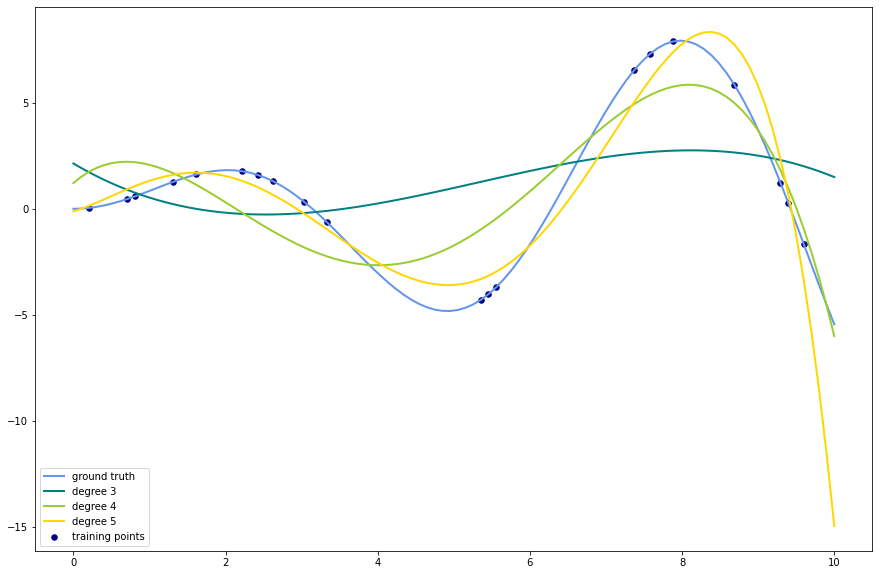

In [12]:
# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause
# URL https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
plt.figure(figsize=(15,10))

# function to approximate by polynomial interpolation
def f(x):
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold', 'red']
lw = 2
plt.plot(x_plot, 
         f(x_plot), 
         color='cornflowerblue', 
         linewidth=lw,
         label="ground truth")
plt.scatter(x, y, 
            color='navy', 
            s=30, 
            marker='o', 
            label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), 
                          Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, 
             y_plot, 
             color=colors[count], 
             linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')
plt.show()

## 2.4 Linear Regression with statsmodels

In [13]:
import numpy as np
import statsmodels.api as sm

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x = np.array(x)
y = np.array(y)
x = sm.add_constant(x)
print(x)
print(y)

# modelling
model = sm.OLS(y, x)

# scoring
results = model.fit()
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

# predict
# print('predicted response:', results.fittedvalues, sep='\n')
# print('predicted response:', results.predict(x), sep='\n')

# predict on new data
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)
y_new = results.predict(x_new)
print(y_new)

# summary
# print(results.summary())
# print(results.summary2())

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]
coefficient of determination: 0.8615939258756776
adjusted coefficient of determination: 0.8062314962259487
regression coefficients: [5.52257928 0.44706965 0.25502548]
[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


# 3. Logistic Regression

URL https://realpython.com/logistic-regression-python/#classification

<!--
### $\hat{y}^{(i)}=\beta_{0}+\beta_{1}x^{(i)}_{1}+\ldots+\beta_{p}x^{(i)}_{p}$

### $ P(y^{(i)}=1)=\frac{1}{1+e^{-(\beta_{0}+\beta_{1}x^{(i)}_{1}+\ldots+\beta_{p}x^{(i)}_{p})}} $

### $ 𝑝(𝐱) = \frac{1}{1 + e^{−𝑓(𝐱)}} $

### $ 𝑓(𝐱) = log \left( \frac{𝑝(𝐱)}{1 − 𝑝(𝐱)} \right) $
//-->

## 3.1 scikit-learn: Logistic Regression
LogisticRegression(**C=1.0**, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
- 'liblinear' solver doesn’t work without regularization.
- 'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
- 'saga' is the only solver that supports elastic-net regularization.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    print(conf_m)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    return

def eval_model(model, x, y):
    p_pred = model.predict_proba(x)
    y_pred = model.predict(x)
    score_ = model.score(x, y)
    report = classification_report(y, y_pred)
    print(p_pred, '\n', y_pred, '\n', score_, '\n', report)
    return

In [15]:
# Get data
x = np.arange(10).reshape(-1, 1)
print(x)

# y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 1 0 0 1 1 1 1 1 1]


In [16]:
# Create a model and train it
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

# Evaluate the model
eval_model(model, x, y)
# plot_confusion_matrix(y, y_pred)

[[0.63246033 0.36753967]
 [0.52083411 0.47916589]
 [0.40708796 0.59291204]
 [0.30250062 0.69749938]
 [0.21503812 0.78496188]
 [0.14751556 0.85248444]
 [0.09853381 0.90146619]
 [0.06458402 0.93541598]
 [0.04178936 0.95821064]
 [0.0268094  0.9731906 ]] 
 [0 0 1 1 1 1 1 1 1 1] 
 0.7 
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.75      0.86      0.80         7

    accuracy                           0.70        10
   macro avg       0.62      0.60      0.60        10
weighted avg       0.68      0.70      0.68        10



**Hyperparameter tuning: set C=10.0 for better prediction? default C=1.0**

In [17]:
# Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Evaluate the model
eval_model(model, x, y)
# plot_confusion_matrix(y, y_pred)

[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]] 
 [0 0 0 1 1 1 1 1 1 1] 
 0.8 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



## 3.2 StatsModels: Logistic Regression¶

In [18]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import classification_report

# Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x)

# Create a model and train it
model = sm.Logit(y, x)
result = model.fit(method='newton')

# Evaluate the model
result.predict(x)
print(result.pred_table())

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7
[[2. 1.]
 [1. 6.]]


**Report with StatsModels**

In [19]:
result.summary()
# result.summary2()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.4263
Time:                        20:03:56   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
==============================================================================
"""

**Report with scikit-learn**

In [20]:
# Classification + report with scikit-learn
y_pred = (result.predict(x) >= 0.5).astype(int)
report = classification_report(y, y_pred)
print(report) 

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



## 3.3 AUC curve For Binary Classification with Breast Cancer Dataset

Accuracy 0.9574468085106383
                  Predicted Benign  Predicted Malignant
Actual Benign                   65                    3
Actual Malignant                 5                  115 

True Positives: {tp} False Positives: {fp} True Negatives: {tn} False Negatives: {fn} 

FPR [0.         0.         0.         0.01470588 0.01470588 0.02941176
 0.02941176 0.04411765 0.04411765 0.05882353 0.05882353 0.07352941
 0.07352941 0.08823529 0.08823529 1.        ] 
TPR [0.         0.00833333 0.78333333 0.78333333 0.85       0.85
 0.89166667 0.89166667 0.96666667 0.96666667 0.975      0.975
 0.99166667 0.99166667 1.         1.        ] 
threshold 
threshold 
ROC-AUC 0.9920343137254902


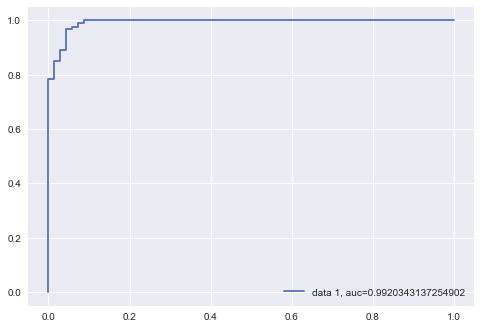

In [21]:
import pandas as pd
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
plt.style.use('seaborn')

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)
clf = LogisticRegression(penalty='l2', 
                         C=0.1, 
                         max_iter=5000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy', metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm, 
                   columns=['Predicted Benign', 'Predicted Malignant'], 
                   index=['Actual Benign', 'Actual Malignant']), '\n')

tn, fp, fn, tp = cm.ravel()
print('True Positives: {tp}', 
      'False Positives: {fp}', 
      'True Negatives: {tn}',
      'False Negatives: {fn}', '\n')

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('FPR', fpr, 
      '\nTPR', tpr, 
      '\nthreshold', 
      '\nthreshold',  
      '\nROC-AUC', auc)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc) )
plt.legend(loc=4)
plt.show()

# 4. Multiclass classification

## 4.1 One-vs-Rest

In [22]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
X = np.array([
    [10, 10],
    [8, 10],
    [-5, 5.5],
    [-5.4, 5.5],
    [-20, -20],
    [-15, -20]
])
y = np.array([0, 0, 1, 1, 2, 2])

clf = OneVsRestClassifier(SVC()).fit(X, y)
clf.predict([[-19, -20], [9, 9], [-5, 5]])

array([2, 0, 1])

## 4.2 One-vs-One

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.33, 
    shuffle=True, 
    random_state=0)

clf = OneVsOneClassifier(
    LinearSVC(max_iter=10000, random_state=0)).fit(X_train, y_train)

clf.predict(X_test[:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])